In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
plant_gen = pd.read_csv('../../../data/Plant_1_Generation_Data.csv')
plant_weat = pd.read_csv('../../../data/Plant_1_Weather_Sensor_Data.csv')

# Convert DATR_TIME from string to datetime
plant_gen['DATE_TIME'] = pd.to_datetime(plant_gen['DATE_TIME'], format='%Y-%m-%d %H:%M')
plant_weat['DATE_TIME'] = pd.to_datetime(plant_weat['DATE_TIME'], format='%Y-%m-%d %H:%M')


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

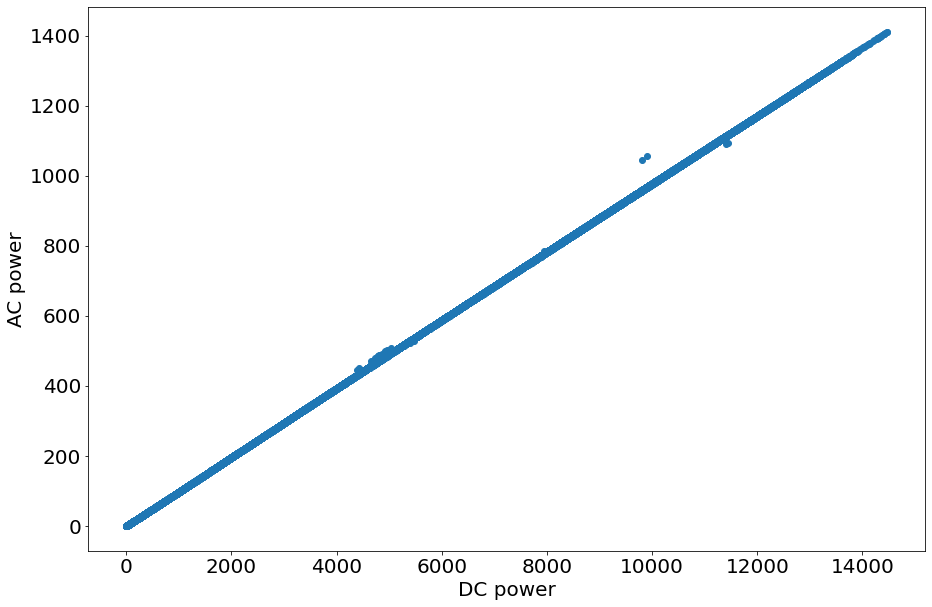

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(plant_gen['DC_POWER'],plant_gen['AC_POWER'])
plt.xlabel('DC Power', fontsize=20)
plt.ylabel('AC Power', fontsize=20)
#plt.title('AC vs. DC power')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

### AK fixed the fit to force it to pass through 0. we are fitting only the coefficient not the intercept

In [16]:
#function returns the data with the heighest and lowest residuals
def anomaly_calculate(data, anomaly_limit=5):
    X = data['DC_POWER'].values.reshape(-1,1)
    y = data['AC_POWER'].values.reshape(-1,1)
    regressor = LinearRegression(fit_intercept=False)
    regressor.fit(X, y)
    m=regressor.coef_[0]
    print(m)
    residual = (data['AC_POWER']-m*data['DC_POWER'])**2 # or we can take the absolute value
    residual = pd.DataFrame(residual)
    new_data = data.copy()
    new_data['AC/DC_residual'] = residual
    #heighest_residuals = new_data.sort_values('AC/DC_residual', ascending = False) # pick whatever number you wish
    mean_res = new_data['AC/DC_residual'].mean()
    stand_dev = new_data['AC/DC_residual'].std()
    new_data['DC_AC_outlier']=0
    new_data.loc[(new_data['AC/DC_residual']>mean_res+anomaly_limit*stand_dev) | (new_data['AC/DC_residual']<mean_res-anomaly_limit*stand_dev),'DC_AC_outlier'] = 1
    return new_data

plant_gen = anomaly_calculate(plant_gen, anomaly_limit=2)

[0.09774104]


In [17]:
plant_gen

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC/DC_residual,DC_AC_outlier,DAY
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,0.0,0,136
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,0.0,0,136
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,0.0,0,136
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,0.0,0,136
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,0.0,0,136
...,...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,0.0,0,169
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,0.0,0,169
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,0.0,0,169
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,0.0,0,169


### AK below are the points that result to be outliers when calculating this way

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

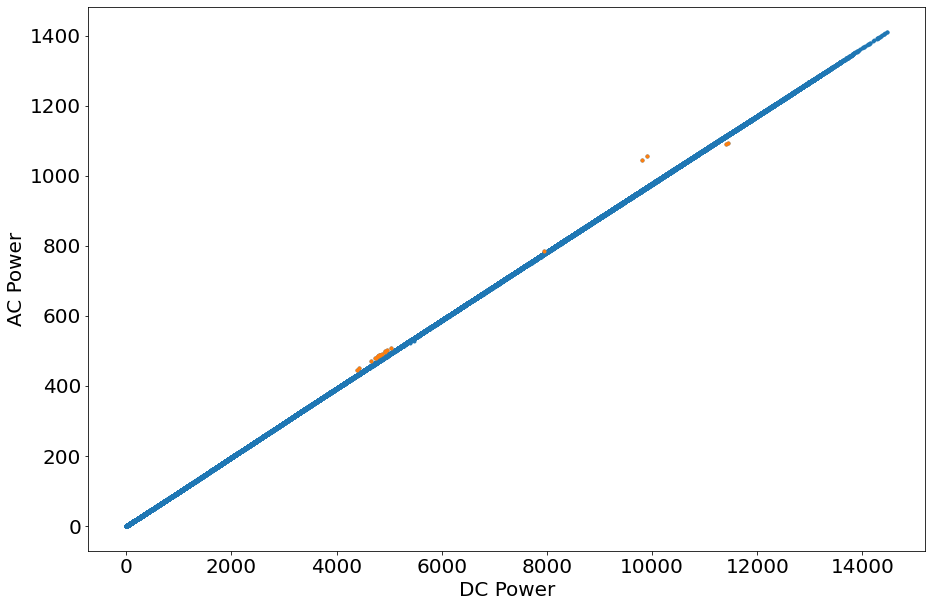

In [18]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.plot(plant_gen['DC_POWER'],plant_gen['AC_POWER'], '.')
plt.plot(plant_gen.loc[plant_gen['DC_AC_outlier']==1, 'DC_POWER'],plant_gen.loc[plant_gen['DC_AC_outlier']==1,'AC_POWER'], '.')
plt.xlabel('DC Power', fontsize=20)
plt.ylabel('AC Power', fontsize=20)
#plt.title('AC vs. DC power')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Text(0.5, 1.0, 'AC vs. DC power')

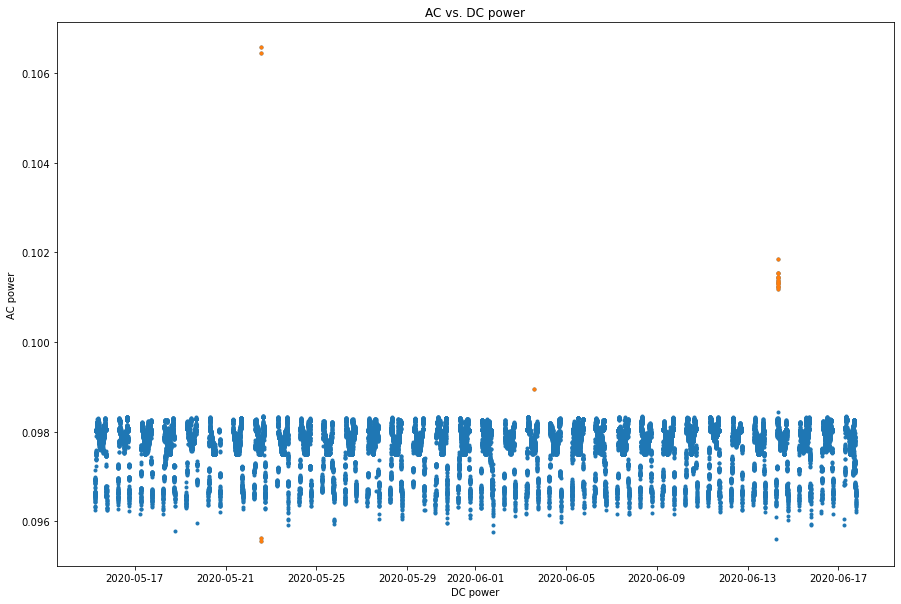

In [19]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.plot(plant_gen['DATE_TIME'], plant_gen['AC_POWER']/plant_gen['DC_POWER'], '.')
plt.plot(plant_gen.loc[plant_gen['DC_AC_outlier']==1, 'DATE_TIME'], plant_gen.loc[plant_gen['DC_AC_outlier']==1, 'AC_POWER']/plant_gen.loc[plant_gen['DC_AC_outlier']==1,'DC_POWER'], '.')
plt.xlabel('DC power')
plt.ylabel('AC power')
plt.title('AC vs. DC power')

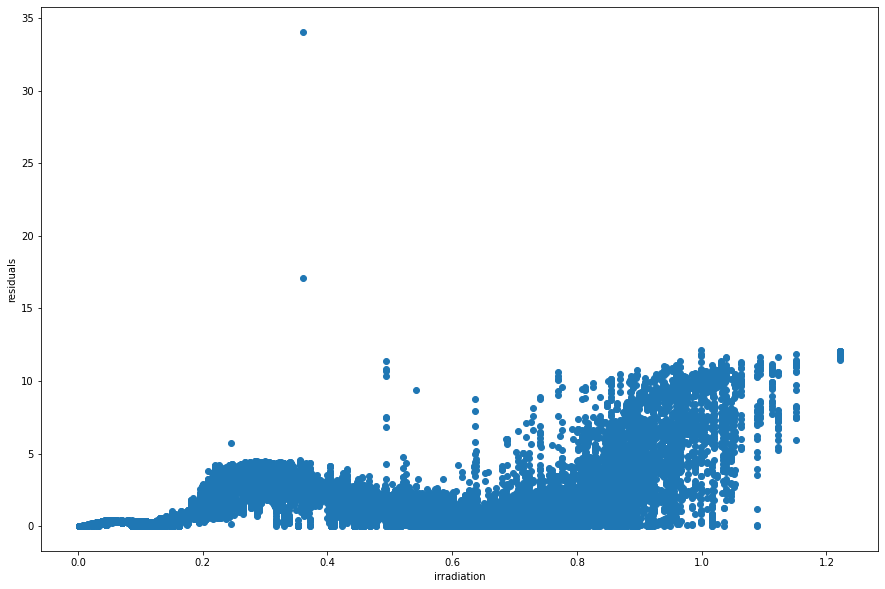

In [20]:
merged_data = pd.merge(plant_gen, plant_weat, how='left', on='DATE_TIME')
# clear data from rows where DC is 0
clear_data = merged_data[(merged_data['DC_POWER'] != 0)&(merged_data['DC_AC_outlier']==0)] 

plt.figure(figsize=(15, 10))
plt.scatter(clear_data['IRRADIATION'],clear_data['AC/DC_residual'])
plt.xlabel('irradiation')
plt.ylabel('residuals')
plt.show()

#### AK after removing those outliers we want to investigate the reason why at high irradiation there is a large group of points with high residuals

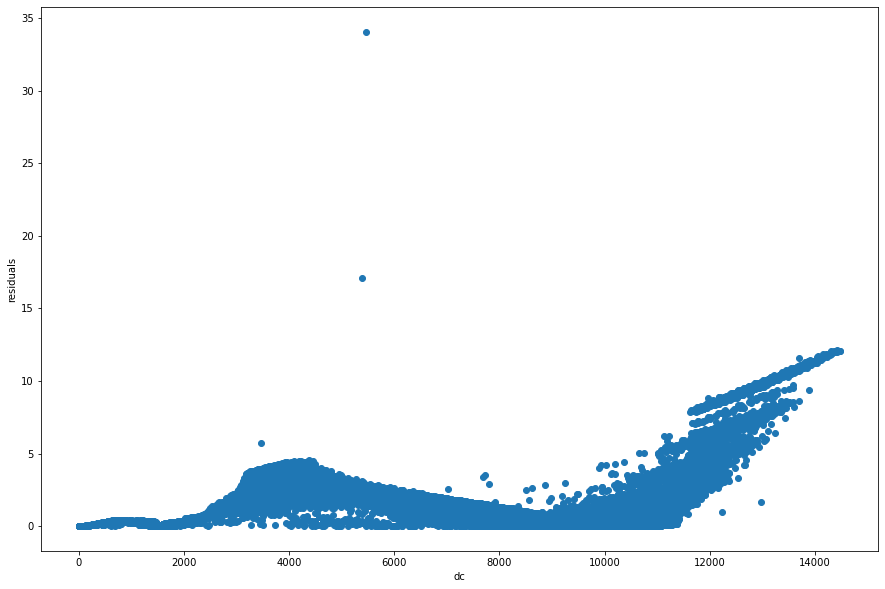

In [21]:
plt.figure(figsize=(15, 10))
plt.scatter(clear_data['DC_POWER'],clear_data['AC/DC_residual'])
plt.xlabel('dc')
plt.ylabel('residuals')
plt.show()

#### AK from the plots above and below it is clear that DC to AC conversion becomes less efficient for high irradiation and DC power values. This is probably just a result of the physics of power conversion. It means however that this behaviour is normal expected behaviour and not an anomaly. WE do not need to separate it

<AxesSubplot:xlabel='IRRADIATION', ylabel='AC/DC_residual'>

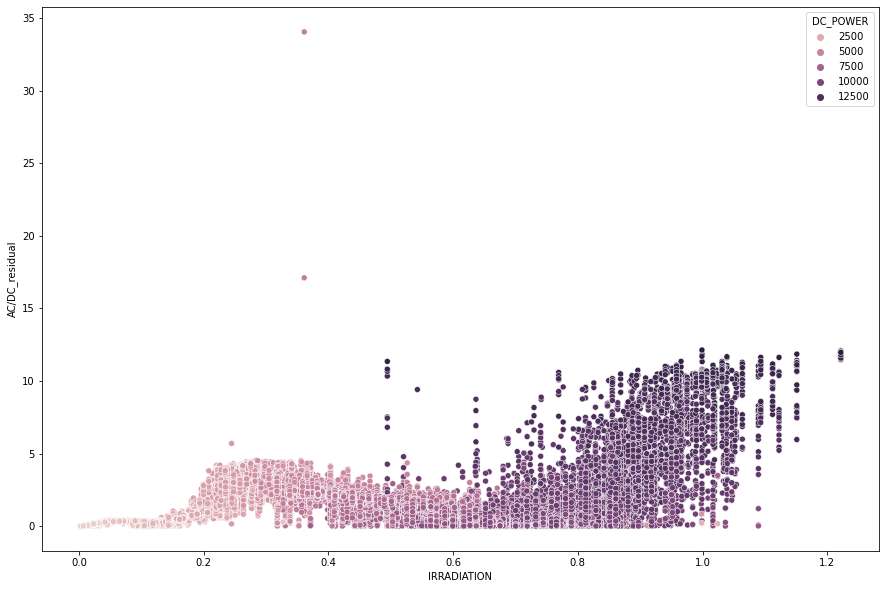

In [22]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'IRRADIATION', y = 'AC/DC_residual', data = clear_data,
               hue = 'DC_POWER')

In [25]:
merged_data['alarm_inefficient_conversion']=0
merged_data.loc[merged_data['AC/DC_residual']>7, 'alarm_inefficient_conversion']=1

Text(0.5, 1.0, 'AC vs. DC power')

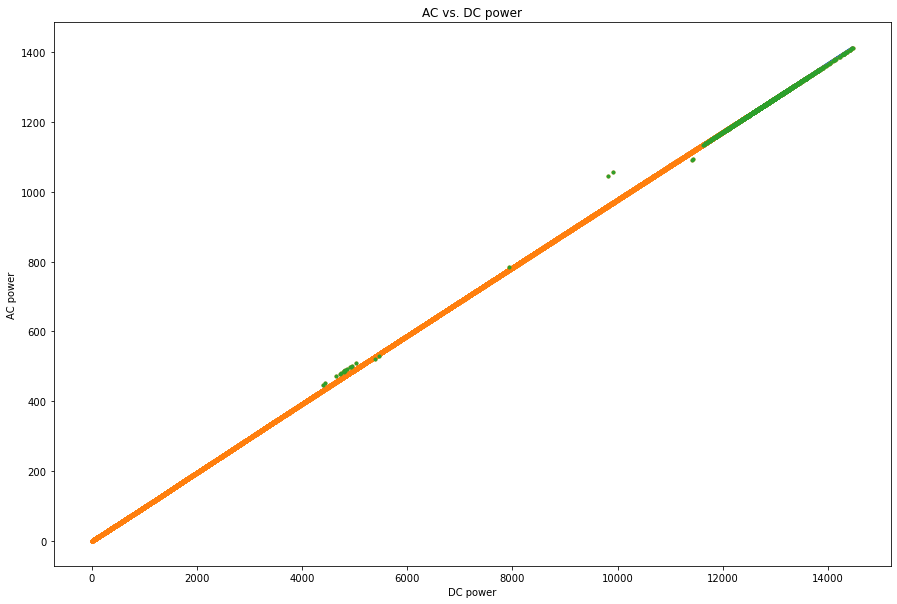

In [26]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.plot(merged_data['DC_POWER'],merged_data['DC_POWER']*0.09774104, '-')
plt.plot(merged_data['DC_POWER'],merged_data['AC_POWER'], '.')
plt.plot(merged_data.loc[merged_data['alarm_inefficient_conversion']==1, 'DC_POWER'],merged_data.loc[merged_data['alarm_inefficient_conversion']==1,'AC_POWER'], '.')

plt.xlabel('DC power')
plt.ylabel('AC power')
plt.title('AC vs. DC power')

<AxesSubplot:xlabel='IRRADIATION', ylabel='DC_POWER'>

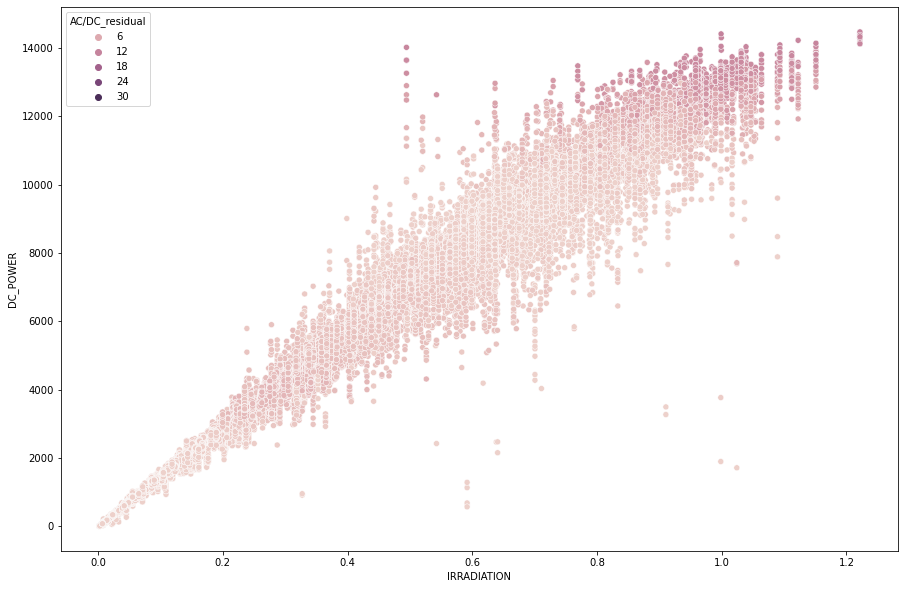

In [27]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'IRRADIATION', y = 'DC_POWER', data = clear_data,
               hue = 'AC/DC_residual')

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

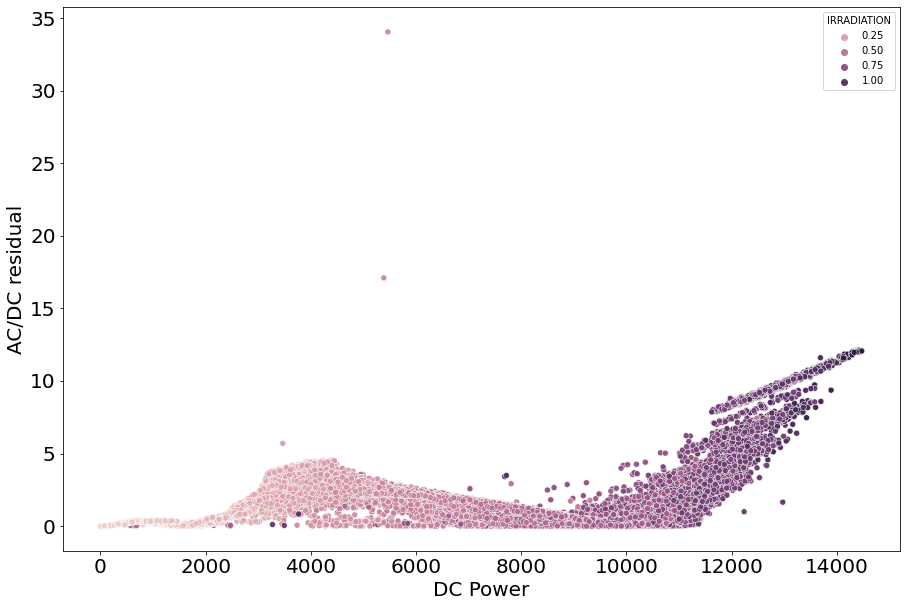

In [28]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'DC_POWER', y = 'AC/DC_residual', data = clear_data,
               hue = 'IRRADIATION')
plt.xlabel('DC Power', fontsize=20)
plt.ylabel('AC/DC residual', fontsize=20)
#plt.title('AC vs. DC power')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

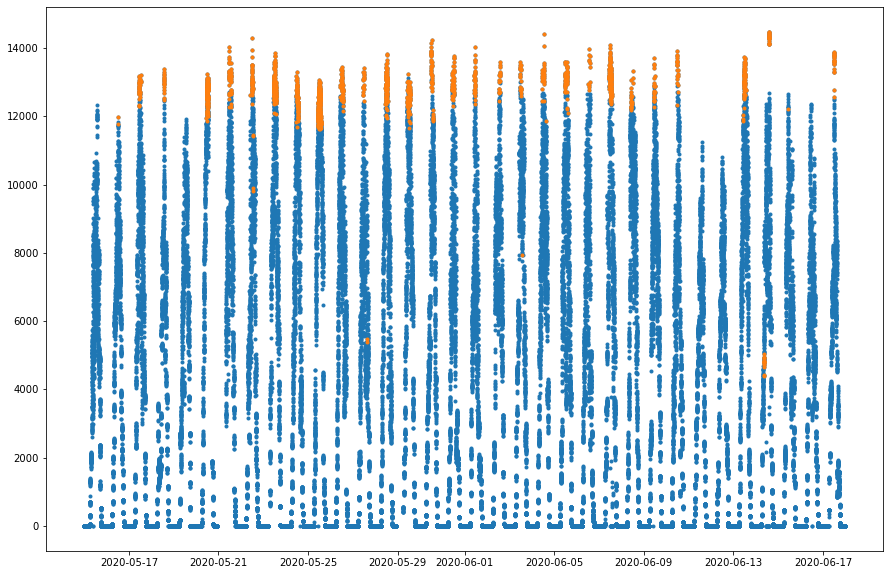

In [95]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.plot(merged_data['DATE_TIME'], merged_data['DC_POWER'], '.')
plt.plot(merged_data[merged_data['alarm_inefficient_conversion']==1]['DATE_TIME'], merged_data[merged_data['alarm_inefficient_conversion']==1]['DC_POWER'], '.')

#### AK its coerrect to calculate anomalies with a rolling logic, so let's repeat out calculation but doing a fit for each inverter and each day

In [348]:
plant_gen = pd.read_csv('../data/Plant_1_Generation_Data.csv')
plant_weat = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')

# Convert DATR_TIME from string to datetime
plant_gen['DATE_TIME'] = pd.to_datetime(plant_gen['DATE_TIME'], format='%Y-%m-%d %H:%M')
plant_weat['DATE_TIME'] = pd.to_datetime(plant_weat['DATE_TIME'], format='%Y-%m-%d %H:%M')

In [10]:
def calculate_linear_fit(data, column_x, column_y):
    coeff=[]
    days=[]
    inverters=[]
    for i in data.SOURCE_KEY.unique():
        inv_data=data[data.SOURCE_KEY==i]
        for a, day in inv_data.groupby(inv_data.DAY):
            inverters.append(i)
            INV=pd.DataFrame(data=np.array(inverters), columns=['Inverter'])
            days.append(a)
            DAYS=pd.DataFrame(data=np.array(days), columns=['Day'])
            X = day[column_x].values.reshape(-1,1)
            y = day[column_y].values.reshape(-1,1)
            regressor = LinearRegression(fit_intercept=False)
            regressor.fit(X, y)
            m=regressor.coef_
            result = []
            [result.extend(el) for el in m] 
            E=[]
            for el in result:
                E.append(el)
            coeff.append(E)
            coefficients = pd.DataFrame(data=np.array(coeff), columns=['Conversion_coeff'])
            conv = [INV, DAYS, coefficients]
            conversion_data = pd.concat(conv, axis=1)
    return(conversion_data)

In [11]:
plant_gen['DAY'] = pd.DatetimeIndex(plant_gen['DATE_TIME']).dayofyear
linear_coeff = calculate_linear_fit(plant_gen, column_x='DC_POWER', column_y='AC_POWER')
linear_coeff.columns=['SOURCE_KEY', 'DAY', 'DC_AC_conversion']

In [12]:
linear_coeff

,SOURCE_KEY,DAY,DC_AC_conversion
0,1BY6WEcLGh8j5v7,136,0.097894
1,1BY6WEcLGh8j5v7,137,0.097882
2,1BY6WEcLGh8j5v7,138,0.097770
3,1BY6WEcLGh8j5v7,139,0.097852
4,1BY6WEcLGh8j5v7,140,0.097869
...,...,...,...
743,YxYtjZvoooNbGkE,165,0.097688
744,YxYtjZvoooNbGkE,166,0.097783
745,YxYtjZvoooNbGkE,167,0.097834
746,YxYtjZvoooNbGkE,168,0.097840


#### AK below is the inclination coefficients of all inverters per day and it's clear that some are differing
Here we would like to calculate 2 things
1. the same outliers that we calculated above (but now in a rolling manner)
2. and inverters for which the conversion coefficient is very different (lower compared to other inverters)

#### AK like shown below the outliers change a bit if we calculate them in a rolling manner, but we can still find the main ones

In [13]:
data=plant_gen
df_coefficients=linear_coeff
outlier_limit=8
data=data.merge(df_coefficients, on=['SOURCE_KEY', 'DAY'])
data['DC_AC_residual'] = (data['AC_POWER']-data['DC_AC_conversion']*data['DC_POWER'])**2
data['upper_limit'] = 0
data['lower_limit'] = 0
for i in data.SOURCE_KEY.unique():
    inv_data=data[data.SOURCE_KEY==i]
    data.loc[data.SOURCE_KEY==i, 'upper_limit'] = inv_data['DC_AC_residual'].rolling(window=96).mean()+outlier_limit*inv_data['DC_AC_residual'].rolling(window=96).std()
    data.loc[data.SOURCE_KEY==i, 'lower_limit'] = inv_data['DC_AC_residual'].rolling(window=96).mean()-outlier_limit*inv_data['DC_AC_residual'].rolling(window=96).std()
data['DC_AC_outliers']=0
data.loc[(data['DC_AC_residual']<data['lower_limit']) | (data['DC_AC_residual']>data['upper_limit']),'DC_AC_outliers' ]=1

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

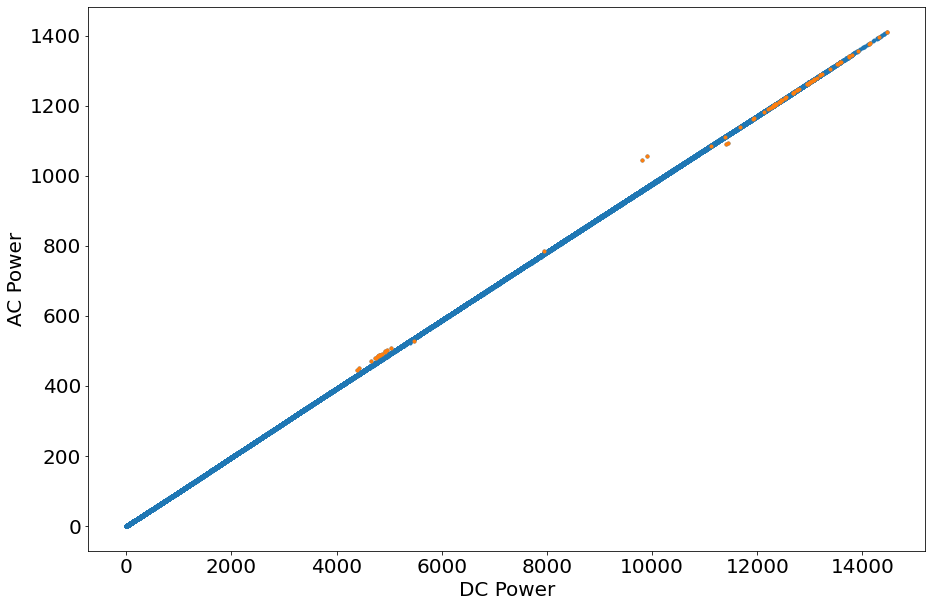

In [14]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.plot(data['DC_POWER'],data['AC_POWER'], '.')
plt.plot(data.loc[data['DC_AC_outliers']==1, 'DC_POWER'],data.loc[data['DC_AC_outliers']==1,'AC_POWER'], '.')
plt.xlabel('DC Power', fontsize=20)
plt.ylabel('AC Power', fontsize=20)
#plt.title('AC vs. DC power')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Text(0.5, 1.0, 'AC vs. DC power')

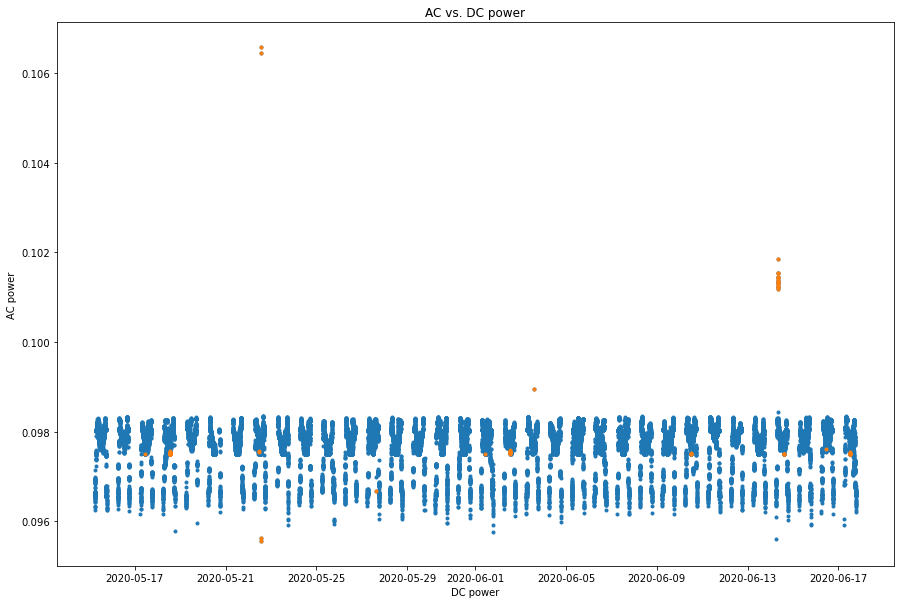

In [355]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.plot(data['DATE_TIME'],data['AC_POWER']/data['DC_POWER'], '.')
plt.plot(data.loc[data['DC_AC_outliers']==1, 'DATE_TIME'],data.loc[data['DC_AC_outliers']==1,'AC_POWER']/data.loc[data['DC_AC_outliers']==1,'DC_POWER'], '.')
plt.xlabel('DC power')
plt.ylabel('AC power')
plt.title('AC vs. DC power')

#### AK for point 2, below we calculate the limits of coefficient values for each day and we can see that by using mean and std the low lying point cannot be detected, but instead the inverter that has shifted values relative to other inverters can be identified

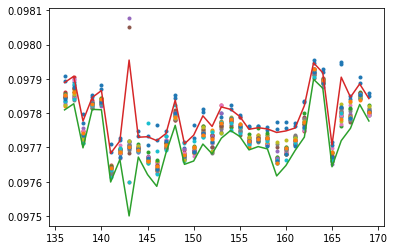

In [364]:
for inv in linear_coeff.SOURCE_KEY.unique():
    plt.plot(linear_coeff[linear_coeff.SOURCE_KEY==inv]['DAY'], linear_coeff[linear_coeff.SOURCE_KEY==inv]['DC_AC_conversion'], '.', label=inv)
low=[]
high=[]
for a, day in linear_coeff.groupby(linear_coeff.DAY):
    low.append(day['DC_AC_conversion'].mean()-2*day['DC_AC_conversion'].std())
    high.append(day['DC_AC_conversion'].mean()+2*day['DC_AC_conversion'].std())
plt.plot(linear_coeff[linear_coeff.SOURCE_KEY==inv]['DAY'], low)
plt.plot(linear_coeff[linear_coeff.SOURCE_KEY==inv]['DAY'], high)

In [365]:
linear_coeff['low_AC_conversion']=0
linear_coeff['high_AC_conversion']=0
for a, day in linear_coeff.groupby(linear_coeff.DAY):
    linear_coeff.loc[day[day['DC_AC_conversion']>day['DC_AC_conversion'].mean()+2*day['DC_AC_conversion'].std()].index, 'high_AC_conversion']=1
    linear_coeff.loc[day[day['DC_AC_conversion']<day['DC_AC_conversion'].mean()-2*day['DC_AC_conversion'].std()].index, 'low_AC_conversion']=1

#### AK so we try to use nearest neighbours to do this. and in this case the low lying point around day 143 is identified along with some other outlying oefficients

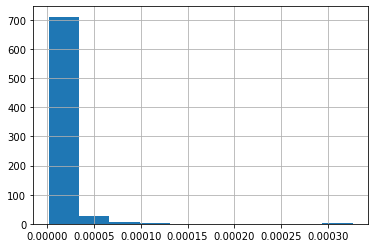

In [359]:
from sklearn.neighbors import NearestNeighbors
X=linear_coeff[['DAY', 'DC_AC_conversion']]
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
distance=pd.DataFrame(distances).loc[:, 1:].mean(axis=1)
distance.hist()
linear_coeff['distance']=distance.values
linear_coeff['distance_outlier']=0
linear_coeff.loc[linear_coeff['distance']>linear_coeff['distance'].mean()+3*linear_coeff['distance'].std(), 'distance_outlier']=1

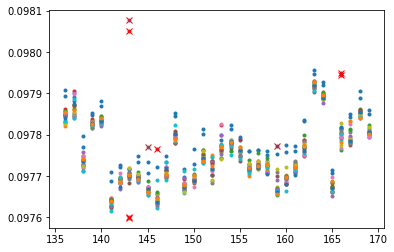

In [360]:
for inv in linear_coeff.SOURCE_KEY.unique():
    plt.plot(linear_coeff[linear_coeff.SOURCE_KEY==inv]['DAY'], linear_coeff[linear_coeff.SOURCE_KEY==inv]['DC_AC_conversion'], '.', label=inv)
plt.plot(linear_coeff[linear_coeff['distance_outlier']==1]['DAY'], linear_coeff[linear_coeff['distance_outlier']==1]['DC_AC_conversion'], 'rx')

In [330]:
from sklearn.neighbors import NearestNeighbors
linear_coeff['distance']=np.nan
for a, day in linear_coeff.groupby(linear_coeff.DAY):
    X=day[['DC_AC_conversion']]
    nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    distance=pd.DataFrame(distances).loc[:, 1:].mean(axis=1)#, columns=['self', 'distance1', 'distance2'])[['distance1', 'distance2']]
    linear_coeff.loc[day.index, 'distance']=distance.values
linear_coeff['distance_outlier']=0
linear_coeff.loc[linear_coeff['distance']>linear_coeff['distance'].mean()+3*linear_coeff['distance'].std(), 'distance_outlier']=1

In [331]:
linear_coeff

,SOURCE_KEY,DAY,DC_AC_conversion,low_AC_conversion,high_AC_conversion,distance_outlier,distance
0,1BY6WEcLGh8j5v7,136,0.097894,0,1,0,0.000036
1,1BY6WEcLGh8j5v7,137,0.097882,0,0,0,0.000010
2,1BY6WEcLGh8j5v7,138,0.097770,0,0,0,0.000025
3,1BY6WEcLGh8j5v7,139,0.097852,0,1,0,0.000018
4,1BY6WEcLGh8j5v7,140,0.097869,0,1,0,0.000027
...,...,...,...,...,...,...,...
743,YxYtjZvoooNbGkE,165,0.097688,0,0,0,0.000010
744,YxYtjZvoooNbGkE,166,0.097783,0,0,0,0.000012
745,YxYtjZvoooNbGkE,167,0.097834,0,0,0,0.000020
746,YxYtjZvoooNbGkE,168,0.097840,0,0,0,0.000007


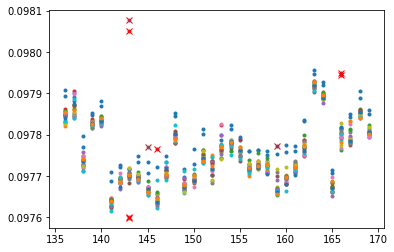

In [333]:
for inv in linear_coeff.SOURCE_KEY.unique():
    plt.plot(linear_coeff[linear_coeff.SOURCE_KEY==inv]['DAY'], linear_coeff[linear_coeff.SOURCE_KEY==inv]['DC_AC_conversion'], '.', label=inv)
plt.plot(linear_coeff[linear_coeff['distance_outlier']==1]['DAY'], linear_coeff[linear_coeff['distance_outlier']==1]['DC_AC_conversion'], 'rx')

In [289]:
distance.mean(axis=1)

0      2.281740e-05
1      5.101918e-06
2      1.703910e-05
3      8.761867e-06
4      1.831627e-05
           ...     
743    1.958752e-06
744    5.676381e-06
745    4.536359e-06
746    2.470063e-06
747    8.730005e-07
Length: 748, dtype: float64

In [182]:
linear_coeff[linear_coeff['high_AC_conversion']==1]

,SOURCE_KEY,DAY,DC_AC_conversion,low_AC_conversion,high_AC_conversion
0,1BY6WEcLGh8j5v7,136,0.097894,0,1
3,1BY6WEcLGh8j5v7,139,0.097852,0,1
4,1BY6WEcLGh8j5v7,140,0.097869,0,1
5,1BY6WEcLGh8j5v7,141,0.097688,0,1
6,1BY6WEcLGh8j5v7,142,0.097727,0,1
8,1BY6WEcLGh8j5v7,144,0.097735,0,1
10,1BY6WEcLGh8j5v7,146,0.097721,0,1
12,1BY6WEcLGh8j5v7,148,0.097845,0,1
15,1BY6WEcLGh8j5v7,151,0.097802,0,1
18,1BY6WEcLGh8j5v7,154,0.097814,0,1


In [56]:
merged_data[merged_data['alarm_inefficient_conversion']==1]['SOURCE_KEY_x'].unique()

array(['3PZuoBAID5Wc2HD', 'McdE0feGgRqW7Ca', 'adLQvlD726eNBSB',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'wCURE6d3bPkepu2',
       '1IF53ai7Xc0U56Y', 'VHMLBKoKgIrUVDU', 'YxYtjZvoooNbGkE',
       'ih0vzX44oOqAx2f', 'sjndEbLyjtCKgGv', 'z9Y9gH1T5YWrNuG',
       'zVJPv84UY57bAof', '7JYdWkrLSPkdwr4', 'ZoEaEvLYb1n2sOq',
       'iCRJl6heRkivqQ3', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'uHbuxQJl8lW7ozc', 'zBIq5rxdHJRwDNY', '1BY6WEcLGh8j5v7',
       'bvBOhCH3iADSZry'], dtype=object)

In [5]:
#function returns the data with the heightes 100 residuals 
def anomaly_head(data):
    coeff = np.polyfit(data['AC_POWER'],data['DC_POWER'],1)
    residual = (data['DC_POWER']-coeff[0]*data['AC_POWER'] -coeff[1])**2 # or we can take the absolute value
    residual = pd.DataFrame(residual)
    new_data = data.copy()
    new_data['AC/DC_residual'] = residual
    heighest_residuals = new_data.sort_values('AC/DC_residual', ascending = False).head(100) # pick whatever number you wish

    return heighest_residuals
head_residuals = anomaly_head(plant_gen)

(array([18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 28128.88487772, 105903.45040747, 183678.01593722, 261452.58146698,
        339227.14699673, 417001.71252648, 494776.27805624, 572550.84358599,
        650325.40911574, 728099.97464549, 805874.54017525]),
 <BarContainer object of 10 artists>)

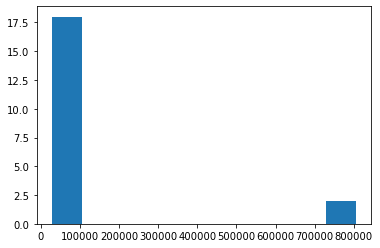

In [6]:
plt.hist(heighest_residuals['AC/DC_residual'])

In [7]:
#anomaly AC residuals during a specific time in a day 
print(heighest_residuals['DATE_TIME'].value_counts())


2020-06-14 08:30:00    16
2020-05-22 13:00:00     4
Name: DATE_TIME, dtype: int64


In [8]:
new_merged_df = pd.merge(heighest_residuals, head_residuals, how='inner', on=['DATE_TIME','SOURCE_KEY'])
new_merged_df


,DATE_TIME,PLANT_ID_x,SOURCE_KEY,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,TOTAL_YIELD_x,AC/DC_residual_x,PLANT_ID_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,TOTAL_YIELD_y,AC/DC_residual_y
0,2020-05-22 13:00:00,4135001,McdE0feGgRqW7Ca,9904.571429,1055.750000,4057.000000,7213112.000,805874.540175,4135001,9904.571429,1055.750000,4057.000000,7213112.000,805874.540175
1,2020-05-22 13:00:00,4135001,sjndEbLyjtCKgGv,9814.285714,1044.900000,4280.000000,7070166.000,769035.638159,4135001,9814.285714,1044.900000,4280.000000,7070166.000,769035.638159
2,2020-05-22 13:00:00,4135001,1IF53ai7Xc0U56Y,11413.250000,1090.557143,4384.285714,6237631.286,64892.694920,4135001,11413.250000,1090.557143,4384.285714,6237631.286,64892.694920
3,2020-05-22 13:00:00,4135001,adLQvlD726eNBSB,11439.500000,1093.771429,4435.000000,6326008.000,61550.585075,4135001,11439.500000,1093.771429,4435.000000,6326008.000,61550.585075
4,2020-06-14 08:30:00,4135001,zVJPv84UY57bAof,4802.875000,487.671429,618.571429,7337578.571,34378.126928,4135001,4802.875000,487.671429,618.571429,7337578.571,34378.126928
5,2020-06-14 08:30:00,4135001,1BY6WEcLGh8j5v7,4431.000000,451.285714,567.142857,6464230.143,34187.849968,4135001,4431.000000,451.285714,567.142857,6464230.143,34187.849968
6,2020-06-14 08:30:00,4135001,rGa61gmuvPhdLxV,4923.000000,499.114286,610.285714,7331280.286,33269.787328,4135001,4923.000000,499.114286,610.285714,7331280.286,33269.787328
7,2020-06-14 08:30:00,4135001,adLQvlD726eNBSB,5025.750000,509.042857,645.142857,6498141.143,32856.576068,4135001,5025.750000,509.042857,645.142857,6498141.143,32856.576068
8,2020-06-14 08:30:00,4135001,ZnxXDlPa8U1GXgE,4791.625000,486.114286,612.714286,6744955.714,32662.193745,4135001,4791.625000,486.114286,612.714286,6744955.714,32662.193745
9,2020-06-14 08:30:00,4135001,VHMLBKoKgIrUVDU,4917.500000,498.242857,627.857143,7430193.857,32034.362036,4135001,4917.500000,498.242857,627.857143,7430193.857,32034.362036


In [9]:
merged_df = pd.merge(heighest_residuals, plant_weat, how='inner', on='DATE_TIME')
merged_df

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC/DC_residual,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-22 13:00:00,4135001,McdE0feGgRqW7Ca,9904.571429,1055.750000,4057.000000,7213112.000,805874.540175,4135001,HmiyD2TTLFNqkNe,31.318955,54.857410,0.814844
1,2020-05-22 13:00:00,4135001,sjndEbLyjtCKgGv,9814.285714,1044.900000,4280.000000,7070166.000,769035.638159,4135001,HmiyD2TTLFNqkNe,31.318955,54.857410,0.814844
2,2020-05-22 13:00:00,4135001,1IF53ai7Xc0U56Y,11413.250000,1090.557143,4384.285714,6237631.286,64892.694920,4135001,HmiyD2TTLFNqkNe,31.318955,54.857410,0.814844
3,2020-05-22 13:00:00,4135001,adLQvlD726eNBSB,11439.500000,1093.771429,4435.000000,6326008.000,61550.585075,4135001,HmiyD2TTLFNqkNe,31.318955,54.857410,0.814844
4,2020-06-14 08:30:00,4135001,zVJPv84UY57bAof,4802.875000,487.671429,618.571429,7337578.571,34378.126928,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
5,2020-06-14 08:30:00,4135001,1BY6WEcLGh8j5v7,4431.000000,451.285714,567.142857,6464230.143,34187.849968,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
6,2020-06-14 08:30:00,4135001,rGa61gmuvPhdLxV,4923.000000,499.114286,610.285714,7331280.286,33269.787328,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
7,2020-06-14 08:30:00,4135001,adLQvlD726eNBSB,5025.750000,509.042857,645.142857,6498141.143,32856.576068,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
8,2020-06-14 08:30:00,4135001,ZnxXDlPa8U1GXgE,4791.625000,486.114286,612.714286,6744955.714,32662.193745,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
9,2020-06-14 08:30:00,4135001,VHMLBKoKgIrUVDU,4917.500000,498.242857,627.857143,7430193.857,32034.362036,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355


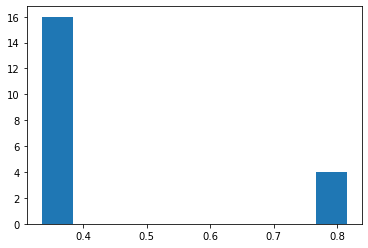

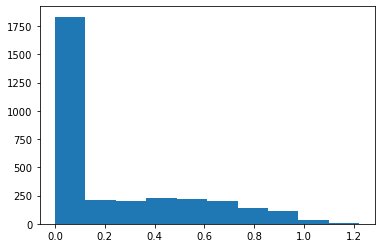

In [10]:
plt.hist(merged_df['IRRADIATION'])
plt.show()
plt.hist(plant_weat['IRRADIATION'])
plt.show()

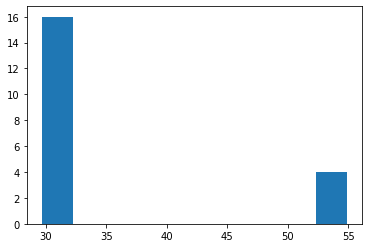

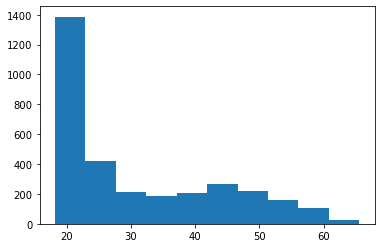

In [11]:
plt.hist(merged_df['MODULE_TEMPERATURE'])
plt.show()
plt.hist(plant_weat['MODULE_TEMPERATURE'])
plt.show()

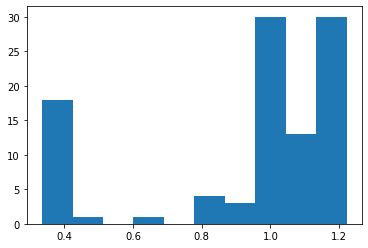

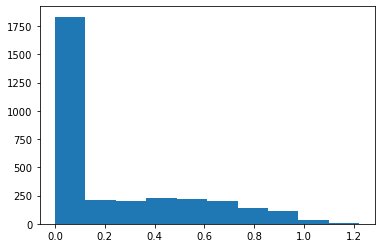

In [12]:
#histograms using head 100 heighest residuals
head_merged = pd.merge(head_residuals, plant_weat, how='inner', on='DATE_TIME')
head_merged
plt.hist(head_merged['IRRADIATION'])
plt.show()
plt.hist(plant_weat['IRRADIATION'])
plt.show()


In [13]:
#function removes the residuals that are higher or lower +- 2std
def remove_outliars(data):
    coeff = np.polyfit(data['AC_POWER'],data['DC_POWER'],1)
    residual = (data['DC_POWER']-coeff[0]*data['AC_POWER'] -coeff[1])**2 # or we can take the absolute value
    residual = pd.DataFrame(residual)
    new_data = data.copy()
    new_data['AC/DC_residual'] = residual
    heighest_residuals = new_data.sort_values('AC/DC_residual', ascending = False) # pick whatever number you wish
    mean_res = heighest_residuals['AC/DC_residual'].mean()
    stand_dev = heighest_residuals['AC/DC_residual'].std()
    print("mean is:",mean_res)
    print("mean+3std:",mean_res+2*stand_dev)
    print("mean+3std:",mean_res-2*stand_dev)
    heighest_residuals = heighest_residuals[(heighest_residuals['AC/DC_residual']<mean_res+2*stand_dev) &
                                     (heighest_residuals['AC/DC_residual']>mean_res-2*stand_dev)]
    return heighest_residuals
residuals_data = remove_outliars(plant_gen)
# residuals_data[residuals_data['AC/DC_residual']<0]

mean is: 122.02161044269084
mean+3std: 8702.62142953627
mean+3std: -8458.578208650888


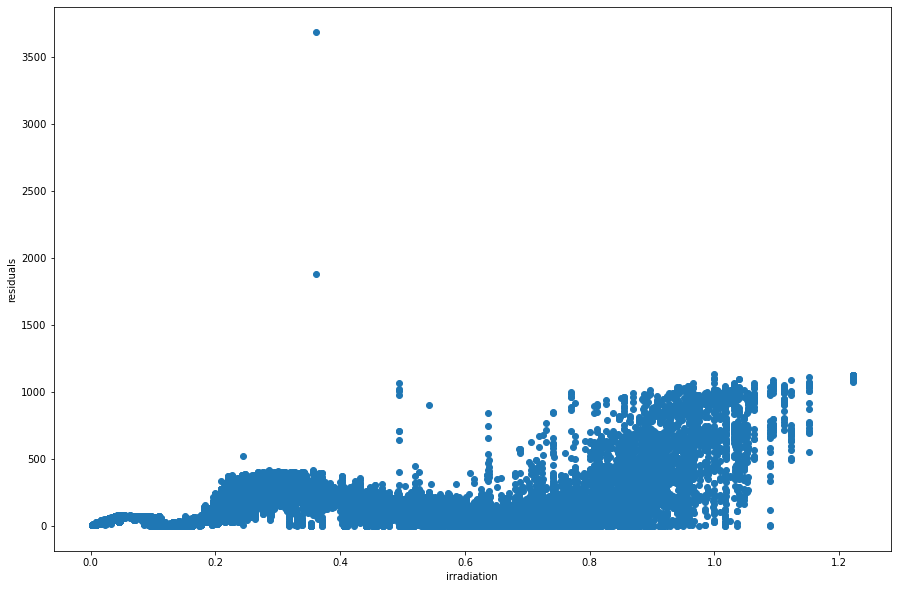

In [14]:
merged_residuals_data = pd.merge(residuals_data, plant_weat, how='inner', on='DATE_TIME')
# clear data from rows where DC is 0
merged_residuals_data = merged_residuals_data[merged_residuals_data['DC_POWER'] != 0] 

plt.figure(figsize=(15, 10))
plt.scatter(merged_residuals_data['IRRADIATION'],merged_residuals_data['AC/DC_residual'])
plt.xlabel('irradiation')
plt.ylabel('residuals')
plt.show()

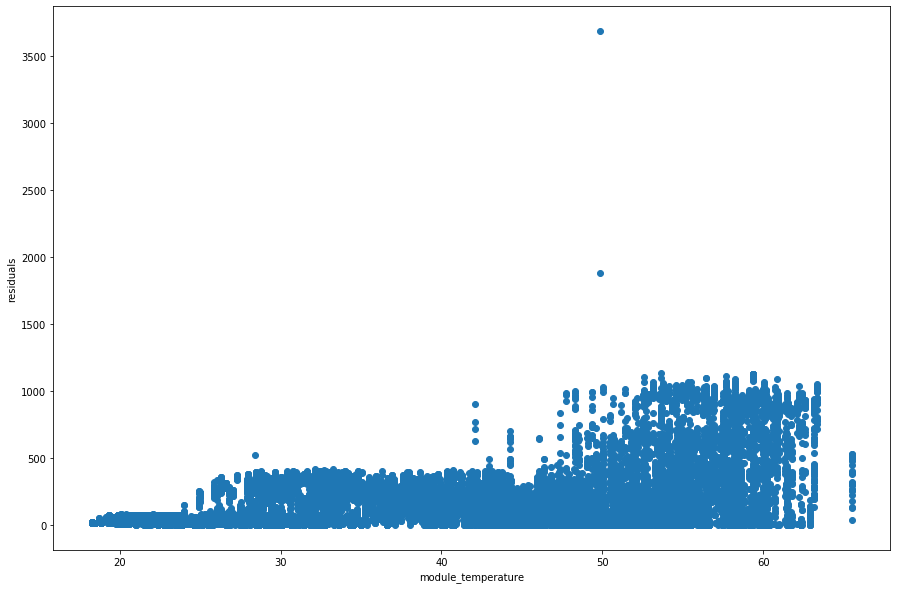

In [16]:
plt.figure(figsize=(15, 10))
plt.scatter(merged_residuals_data['MODULE_TEMPERATURE'],merged_residuals_data['AC/DC_residual'])
plt.xlabel('module_temperature')
plt.ylabel('residuals')
plt.show()

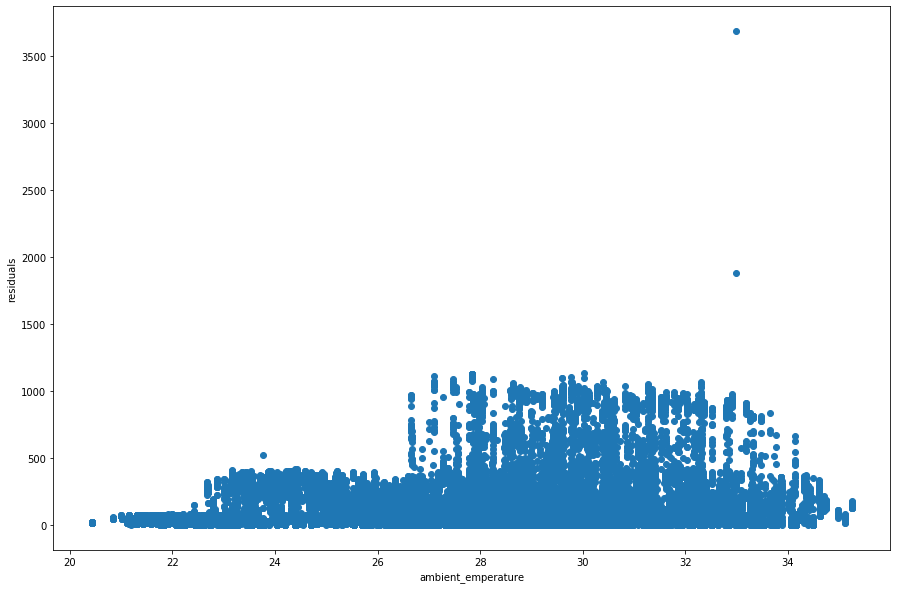

In [17]:
plt.figure(figsize=(15, 10))
plt.scatter(merged_residuals_data['AMBIENT_TEMPERATURE'],merged_residuals_data['AC/DC_residual'])
plt.xlabel('ambient_emperature')
plt.ylabel('residuals')
plt.show()

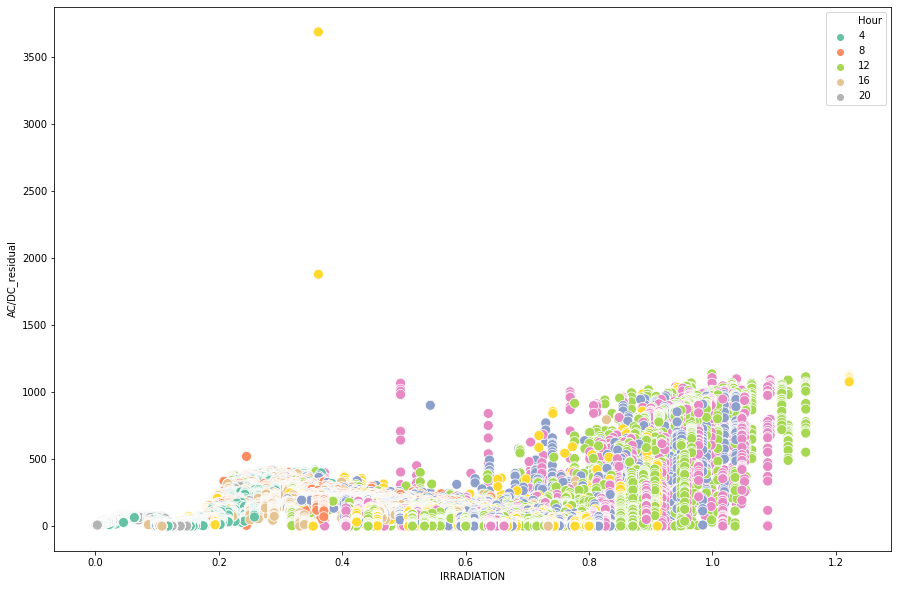

In [18]:
# sns.scatterplot(merged_residuals_data['IRRADIATION'],merged_residuals_data['AC/DC_residual'])
merged_residuals_data['Hour'] = merged_residuals_data.DATE_TIME.dt.hour

plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'IRRADIATION', y = 'AC/DC_residual', data = merged_residuals_data,
               hue = 'Hour', s = 100, palette='Set2')

In [19]:
merged_residuals_data['AC/DC_residual'].std()

193.01591247868583